# Predykcja wyniku meczu CS:GO
CS:GO - https://pl.wikipedia.org/wiki/Counter-Strike:_Global_Offensive

### Dane:
Dane zostały pozyskane poprzez webscarping ogolnodostępnej strony : https://www.hltv.org/, zawierające wyniki oraz statystyki profesjonalnych meczów cs:go.
Skrypty potrzebne do pobrania danych znajduja się w osobnym pliku !!!!!!!!!!!!!(NAZWE WSTAW)

### Cel:
Okreslenie wyniku pojedynczego spotkania - która drużyna zwycięzy. Sprowadza się to do zadania 1 jezeli wygrywa pierwsza druzyna oraz 0 jezeli wygrywa 2 druzyna (klasyfikator binarny)

### Klasa problemu:
Jako że znamy wyniki spotkań(label) mozemy wykorzystać uczenie nadzorowane (supervised learning). Znana jest takze liczba klas (2)





In [1]:
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

Pobieramy dane wczesniej przygotowane po stronie 2 skryptu

In [2]:
df_data = pd.read_pickle('df_data_connected.pkl')

In [3]:
pd.set_option('display.max_columns', 500)
df_data.head(10)

,date,team1main,team2main,map,eventmain,link,score_team1main,score_team2main,date_time,eventdetails,map_number,match_type,score_team1details,score_team2details,score_total,team1details,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_player_name_1,team1_player_name_2,team1_player_name_3,team1_player_name_4,team1_player_name_5,team1_rating,team1_score_1half,team1_score_2half,team1side,team2details,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_player_name_1,team2_player_name_2,team2_player_name_3,team2_player_name_4,team2_player_name_5,team2_rating,team2_score_1half,team2_score_2half,map_name
0,2012-10-11,NiP,HastaLaVista,Train_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,3,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,2.0,Best of 3,16,3,2 - 0,NiP,1,14,-,-,-,-,-,0,0,0,0,0,7,9,4,11,8,-,-,-,-,-,23 (0),20 (0),14 (0),16 (0),12 (0),1.92,1.55,1.53,1.32,1.09,f0rest,Xizt,Fifflaren,friberg,GeT_RiGhT,1.49,12,4,ct-color,HastaLaVista,0,5,-,-,-,-,-,0,0,0,0,0,17,17,16,18,18,-,-,-,-,-,11 (0),8 (0),6 (0),7 (0),7 (0),0.69,0.47,0.45,0.44,0.38,ruggah,cajunb,Pimp,MSL,zn0pe,0.49,3,0,Train_se
1,2012-10-11,NiP,HastaLaVista,Train_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,3,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,1.0,Best of 3,16,8,2 - 0,NiP,2,15,-,-,-,-,-,0,0,0,0,0,13,15,14,15,16,-,-,-,-,-,26 (0),21 (0),18 (0),17 (0),16 (0),1.86,1.30,1.09,1.02,0.90,f0rest,friberg,GeT_RiGhT,Xizt,Fifflaren,1.23,10,6,ct-color,HastaLaVista,3,9,-,-,-,-,-,0,0,0,0,0,17,19,19,21,22,-,-,-,-,-,20 (0),16 (0),16 (0),10 (0),8 (0),1.32,0.92,0.82,0.45,0.37,Pimp,zn0pe,cajunb,ruggah,MSL,0.78,5,3,Train_se
2,2012-10-11,NiP,HastaLaVista,Inferno_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,8,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,2.0,Best of 3,16,3,2 - 0,NiP,1,14,-,-,-,-,-,0,0,0,0,0,7,9,4,11,8,-,-,-,-,-,23 (0),20 (0),14 (0),16 (0),12 (0),1.92,1.55,1.53,1.32,1.09,f0rest,Xizt,Fifflaren,friberg,GeT_RiGhT,1.49,12,4,ct-color,HastaLaVista,0,5,-,-,-,-,-,0,0,0,0,0,17,17,16,18,18,-,-,-,-,-,11 (0),8 (0),6 (0),7 (0),7 (0),0.69,0.47,0.45,0.44,0.38,ruggah,cajunb,Pimp,MSL,zn0pe,0.49,3,0,Inferno_se
3,2012-10-11,NiP,HastaLaVista,Inferno_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,8,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,1.0,Best of 3,16,8,2 - 0,NiP,2,15,-,-,-,-,-,0,0,0,0,0,13,15,14,15,16,-,-,-,-,-,26 (0),21 (0),18 (0),17 (0),16 (0),1.86,1.30,1.09,1.02,0.90,f0rest,friberg,GeT_RiGhT,Xizt,Fifflaren,1.23,10,6,ct-color,HastaLaVista,3,9,-,-,-,-,-,0,0,0,0,0,17,19,19,21,22,-,-,-,-,-,20 (0),16 (0),16 (0),10 (0),8 (0),1.32,0.92,0.82,0.45,0.37,Pimp,zn0pe,cajunb,ruggah,MSL,0.78,5,3,Inferno_se
4,2012-10-11,Red Dead,mousesports,Inferno_se,ESL Pro Series Germany Winter Season 2012,https://www.hltv.org/stats/matches/mapstatsid/...,2,16,2012-10-11 20:00,ESL Pro Series Germany Winter Season 2012,1.0,Best of 1,16,2,NaN,mousesports,3,13,-,-,-,-,-,0,0,0,0,0,6,11,11,9,10,-,-,-,-,-,24 (0),17 (0),16 (0),13 (0),12 (0),2.08,1.30,1.25,1.11,0.98

##### 1. Usuwamy zduplikowane wiersze

In [4]:
df_data = df_data.drop_duplicates(['link'])

In [5]:
df_data

,date,team1main,team2main,map,eventmain,link,score_team1main,score_team2main,date_time,eventdetails,map_number,match_type,score_team1details,score_team2details,score_total,team1details,team1_clutches_won,team1_first_kills,team1_p_ADR_1,team1_p_ADR_2,team1_p_ADR_3,team1_p_ADR_4,team1_p_ADR_5,team1_p_asists_1,team1_p_asists_2,team1_p_asists_3,team1_p_asists_4,team1_p_asists_5,team1_p_death_1,team1_p_death_2,team1_p_death_3,team1_p_death_4,team1_p_death_5,team1_p_kast_1,team1_p_kast_2,team1_p_kast_3,team1_p_kast_4,team1_p_kast_5,team1_p_kills_1,team1_p_kills_2,team1_p_kills_3,team1_p_kills_4,team1_p_kills_5,team1_p_rating_1,team1_p_rating_2,team1_p_rating_3,team1_p_rating_4,team1_p_rating_5,team1_player_name_1,team1_player_name_2,team1_player_name_3,team1_player_name_4,team1_player_name_5,team1_rating,team1_score_1half,team1_score_2half,team1side,team2details,team2_clutches_won,team2_first_kills,team2_p_ADR_1,team2_p_ADR_2,team2_p_ADR_3,team2_p_ADR_4,team2_p_ADR_5,team2_p_asists_1,team2_p_asists_2,team2_p_asists_3,team2_p_asists_4,team2_p_asists_5,team2_p_death_1,team2_p_death_2,team2_p_death_3,team2_p_death_4,team2_p_death_5,team2_p_kast_1,team2_p_kast_2,team2_p_kast_3,team2_p_kast_4,team2_p_kast_5,team2_p_kills_1,team2_p_kills_2,team2_p_kills_3,team2_p_kills_4,team2_p_kills_5,team2_p_rating_1,team2_p_rating_2,team2_p_rating_3,team2_p_rating_4,team2_p_rating_5,team2_player_name_1,team2_player_name_2,team2_player_name_3,team2_player_name_4,team2_player_name_5,team2_rating,team2_score_1half,team2_score_2half,map_name
0,2012-10-11,NiP,HastaLaVista,Train_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,3,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,2.0,Best of 3,16,3,2 - 0,NiP,1,14,-,-,-,-,-,0,0,0,0,0,7,9,4,11,8,-,-,-,-,-,23 (0),20 (0),14 (0),16 (0),12 (0),1.92,1.55,1.53,1.32,1.09,f0rest,Xizt,Fifflaren,friberg,GeT_RiGhT,1.49,12,4,ct-color,HastaLaVista,0,5,-,-,-,-,-,0,0,0,0,0,17,17,16,18,18,-,-,-,-,-,11 (0),8 (0),6 (0),7 (0),7 (0),0.69,0.47,0.45,0.44,0.38,ruggah,cajunb,Pimp,MSL,zn0pe,0.49,3,0,Train_se
2,2012-10-11,NiP,HastaLaVista,Inferno_se,ESWC 2012 Nordic Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,8,2012-10-11 20:00,ESWC 2012 Nordic Qualifier,2.0,Best of 3,16,3,2 - 0,NiP,1,14,-,-,-,-,-,0,0,0,0,0,7,9,4,11,8,-,-,-,-,-,23 (0),20 (0),14 (0),16 (0),12 (0),1.92,1.55,1.53,1.32,1.09,f0rest,Xizt,Fifflaren,friberg,GeT_RiGhT,1.49,12,4,ct-color,HastaLaVista,0,5,-,-,-,-,-,0,0,0,0,0,17,17,16,18,18,-,-,-,-,-,11 (0),8 (0),6 (0),7 (0),7 (0),0.69,0.47,0.45,0.44,0.38,ruggah,cajunb,Pimp,MSL,zn0pe,0.49,3,0,Inferno_se
4,2012-10-11,Red Dead,mousesports,Inferno_se,ESL Pro Series Germany Winter Season 2012,https://www.hltv.org/stats/matches/mapstatsid/...,2,16,2012-10-11 20:00,ESL Pro Series Germany Winter Season 2012,1.0,Best of 1,16,2,NaN,mousesports,3,13,-,-,-,-,-,0,0,0,0,0,6,11,11,9,10,-,-,-,-,-,24 (0),17 (0),16 (0),13 (0),12 (0),2.08,1.30,1.25,1.11,0.98,Troubley,stavros,approx,nex,strux1,1.34,13,3,t-color,Red Dead,0,4,-,-,-,-,-,0,0,0,0,0,17,16,17,17,16,-,-,-,-,-,18 (0),11 (0),7 (0),7 (0),4 (0),1.11,0.73,0.47,0.40,0.28,fl0w,cavy,stefan,kev1n,caLipo,0.60,2,0,Inferno_se
5,2012-10-10,mousesports,Tt Dragons,Mirage_ce,ESWC 2012 German Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,16,8,2012-10-10 21:00,ESWC 2012 German Qualifier,2.0,Best of 3,8,16,0 - 2,Tt Dragons,0,12,-,-,-,-,-,0,0,0,0,0,19,17,19,22,17,-,-,-,-,-,22 (14),17 (7),15 (4),16 (8),5 (2),1.15,0.97,0.76,0.67,0.48,Kaiii,mT,MoRs.na,kemo,deathX,0.81,6,2,t-color,mousesports,2,12,-,-,-,-,-,0,0,0,0,0,16,14,18,13,14,-,-,-,-,-,23 (12),21 (11),20 (3),14 (2),16 (8),1.56,1.34,1.14,0.98,0.97,stavros,Troubley,strux1,approx,nex,1.20,9,7,Mirage_ce
7,2012-10-10,Tt Dragons,mousesports,Dust2_se,ESWC 2012 German Qualifier,https://www.hltv.org/stats/matches/mapstatsid/...,7,16,2012-10-10 21:00,ESWC 2012 German Qualifier,2.0,Best of 3,8,16,0 - 2,Tt Dragons,0,12,-,-,-,-,-,0,0,0,0,0,19,17,19,22,17,-,-,-,-,-,22 (14),17 (7),15 (4),16 (8),5 (2),1.15,0.97,0.7

##### Ponizej liczba wierszy przed wstepna obróbka, sprawdzamy typy naszych danych

In [6]:
len(df_data.index)

66654

In [7]:
df_data.dtypes

date                   datetime64[ns]
team1main                      object
team2main                      object
map                            object
eventmain                      object
link                           object
score_team1main                object
score_team2main                object
date_time                      object
eventdetails                   object
map_number                    float64
match_type                     object
score_team1details             object
score_team2details             object
score_total                    object
team1details                   object
team1_clutches_won             object
team1_first_kills              object
team1_p_ADR_1                  object
team1_p_ADR_2                  object
team1_p_ADR_3                  object
team1_p_ADR_4                  object
team1_p_ADR_5                  object
team1_p_asists_1               object
team1_p_asists_2               object
team1_p_asists_3               object
team1_p_asis

##### 2. Większosc naszych danych jest typu object - zamieniamy je do prawidlowego typu.

Dane : 
- date - data spotkanie - te same informacje mamy w date_time - USUWAMY
- team1main - (str) nazwa zespol 1
- team2main - (str) nazwa zespol 2 
- map - (str) nazwa mapy 
- eventmain - (str) nazwa eventu 
- link - (str) link do strony zawierajace informacje o spotkaniu, bez wartosci przy modelowaniu - USUWAMY
- score_team1main - (int) wynik 1 zespol
- score_team2main - (int) wynik 2 zespol
- date_time - (datetime) data oraz czas spotkanie 
- eventdetails - (str) nazwa eventu - nazwa powtorzona - USUWAMY 
- map_number - (int) - nr mapy dla calego meczu 
- match_type - (str) - typ spotkania (best of 3, best of 5)
- score_team1details & score_team2details - nazwy druzyn - USUWAMY
- score_total -  wynik dla calego meczu - zawiera dane ktore nie beda dostepne w sytuacji prognozy(dane z przyszłosci)-USUWANY
- team1details & team2details - nazwy druzyn - juz obecne w bazie - usuwamy
- team1_clutches_won & team2_clutches_won - (int) wygranych clutchy - odpowiednio dla 1 i 2 druzyny (w sytuacji przewagi jednej z druzyn
- team1_first_kills & team2_first_kills - (int) liczba otwierajacych zabojstw
- team1_p_ADR_1 - (float) Average Damage Ratio - srednia zadawanych obrazen tu dla 1 gracza dla 1 druzyny - reszta ADR analogicznie 
- team1_p_asists_1 (int) liczba asyst w zabojstwach - analogicznie dla pozostalych graczy
- team1_p_death_1 (int) liczba smierci - analogicznie dla pozostalych graczy
- team1_p_kast_1 (float)  procent rund w ktorych gracz zaliczyl zabojstwo lub asyste - analogicznie dla pozostalych graczy
- team1_p_kills_1 (int) liczba zabojstw - analogicznie dla pozostalych graczy
- team1_p_rating_1 - (float) - rating dla gracza ustalany prze HLTV - analogicznie dla pozostalych graczy
- team1_player_name_1 (str) - nick zawodnika
- team1_rating (float) rating dla calego zespolu ustalany prze HLTV - analogicznie dla pozostalych graczy
- team1_score_1half (int) - wynik 1 zespolu po 1 polowwie - analogicznie dla 2 zespolu oraz dla 2 polow
- team1side (str) - strona po ktorej rozpoczyna 1 zespol
- map name - nazwa mapy - powtorzone - USUWAMY




In [8]:
# usuwamy niepotrzebne kolumny

#powtorzone kolumny
df_data = df_data.drop(columns =['eventdetails', 'score_team1details','score_team2details','team1details','team2details','map_name', 'link'])

#nie bedziemy mieli tej danej w przyszlosci
df_data = df_data.drop(columns =['score_total'])

In [9]:
# dodatkowo usuwamy wiersze dla ktorych nie udalo sie pobrac danych szczegolowych
df_data = df_data.dropna()

In [10]:
# mozemy takze zawazyc ze dane niedostepne sa zapisane jako - oznacza to ze dane zostaly pobrane ale nie sa one dostepne 
#dla konkretnego spotkania
# np. team1_p_ADR_1
df_data[['team1main','team2main','team1_p_ADR_1']].head(5)

,team1main,team2main,team1_p_ADR_1
0,NiP,HastaLaVista,-
2,NiP,HastaLaVista,-
4,Red Dead,mousesports,-
5,mousesports,Tt Dragons,-
7,Tt Dragons,mousesports,-


In [11]:
# zaieniamy - na nan
df_data = df_data.replace('-', np.nan)

In [12]:
# kolumna z zabojstwami zawiera informacje w formacie 12 (2) - z czym 1 wartosc oznacza liczbe zabojstw a 2 oznacza liczbe headshotow 
# przeksztalcamy dane w taki sposob aby wyciagnac z danych tylko liczbe zabojstw
df_data.team1_p_kills_1.iloc[-1]

'7 (1)'

In [13]:
def get_kills(row_text):
    kills = row_text.split(" ")[0]
    return kills

lista_kolumn = ['team1_p_kills_1', 'team1_p_kills_2',
       'team1_p_kills_3', 'team1_p_kills_4', 'team1_p_kills_5', 'team1_p_asists_1',
       'team1_p_asists_2', 'team1_p_asists_3', 'team1_p_asists_4',
       'team1_p_asists_5', 'team2_p_asists_1',
       'team2_p_asists_2', 'team2_p_asists_3', 'team2_p_asists_4',
       'team2_p_asists_5','team2_p_kills_1', 'team2_p_kills_2',
       'team2_p_kills_3', 'team2_p_kills_4', 'team2_p_kills_5']

for kolumna in lista_kolumn:
    df_data[kolumna] = df_data[kolumna].apply(lambda x: get_kills(x))

In [14]:
# kolumna z % rund w ktorych byla asysta lub zabojstwo - jest zapisana w formacie XX% - ktory jest formatem str - 
# wycinamy %
df_data.iloc[-1]['team1_p_kast_1']

'96.3%'

In [15]:

def remove_last_elment_from_str(cell):
    if isinstance(cell , str):
        cell=cell[:-1]
    return cell


column_list = ['team1_p_kast_1', 'team1_p_kast_2', 'team1_p_kast_3', 'team1_p_kast_4',
       'team1_p_kast_5', 'team2_p_kast_1', 'team2_p_kast_2', 'team2_p_kast_3', 'team2_p_kast_4',
       'team2_p_kast_5']

for column in column_list:
    df_data[column] = df_data[column].apply(lambda x: remove_last_elment_from_str(x))

In [16]:
# mozemy zmienic typ danych na prawidlowe

In [17]:
#ponizej lista kolumn z prawidlowymi typami danych liczbowych

int_list = ['score_team1main' , 'score_team2main','map_number','team1_clutches_won', 'team1_first_kills','team1_p_asists_1',
       'team1_p_asists_2', 'team1_p_asists_3', 'team1_p_asists_4',
       'team1_p_asists_5', 'team1_p_death_1', 'team1_p_death_2',
       'team1_p_death_3', 'team1_p_death_4', 'team1_p_death_5','team1_p_kills_1', 'team1_p_kills_2',
       'team1_p_kills_3', 'team1_p_kills_4', 'team1_p_kills_5','team1_score_1half',
       'team1_score_2half', 'team2_clutches_won', 'team2_first_kills','team2_p_asists_1',
       'team2_p_asists_2', 'team2_p_asists_3', 'team2_p_asists_4',
       'team2_p_asists_5','team2_p_death_1', 'team2_p_death_2',
       'team2_p_death_3', 'team2_p_death_4', 'team2_p_death_5','team2_p_kills_1', 'team2_p_kills_2',
       'team2_p_kills_3', 'team2_p_kills_4', 'team2_p_kills_5','team2_score_1half',
       'team2_score_2half']

df_data[int_list] = df_data[int_list].astype(int)

float_list = ['team1_p_ADR_1','team1_p_ADR_1', 'team1_p_ADR_2', 'team1_p_ADR_3',
       'team1_p_ADR_4', 'team1_p_ADR_5','team1_p_kast_1', 'team1_p_kast_2', 'team1_p_kast_3', 'team1_p_kast_4',
       'team1_p_kast_5','team1_p_rating_1', 'team1_p_rating_2', 'team1_p_rating_3',
       'team1_p_rating_4', 'team1_p_rating_5','team1_rating','team2_p_ADR_1', 'team2_p_ADR_2', 'team2_p_ADR_3',
       'team2_p_ADR_4', 'team2_p_ADR_5','team2_p_kast_1', 'team2_p_kast_2', 'team2_p_kast_3', 'team2_p_kast_4',
       'team2_p_kast_5','team2_p_rating_1', 'team2_p_rating_2', 'team2_p_rating_3',
       'team2_p_rating_4', 'team2_p_rating_5','team2_rating' ]

df_data[float_list] = df_data[float_list].astype(float, inplace=True)

In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65760 entries, 0 to 853
Data columns (total 91 columns):
date                   65760 non-null datetime64[ns]
team1main              65760 non-null object
team2main              65760 non-null object
map                    65760 non-null object
eventmain              65760 non-null object
score_team1main        65760 non-null int32
score_team2main        65760 non-null int32
date_time              65760 non-null object
map_number             65760 non-null int32
match_type             65760 non-null object
team1_clutches_won     65760 non-null int32
team1_first_kills      65760 non-null int32
team1_p_ADR_1          53631 non-null float64
team1_p_ADR_2          53631 non-null float64
team1_p_ADR_3          53628 non-null float64
team1_p_ADR_4          53628 non-null float64
team1_p_ADR_5          53631 non-null float64
team1_p_asists_1       65760 non-null int32
team1_p_asists_2       65760 non-null int32
team1_p_asists_3       65760 non

##### 3. przetwarzamy dane tak aby tworzyly potrzebna informacje :
- z danych wynik okreslamy ktora druzyna jest zwycieska
- czyscimy nazwe map
- zamieniamy nazwy turniejow - dopasowujemy wielkosc turnieju do nazwy
- zamien date godzine na pore dnia

In [19]:
# tworzymy kolumne mowiaca ktora druzyna wygrala
def who_win(row):
    if row.score_team1main >row.score_team2main:
        return 1
    else:
        return 0

df_data['winner'] = df_data.apply(lambda x : who_win(x) , axis=1)

 

In [20]:
## czyscimy nazwy map - nazwyy sa pisane z malych/ duzych liter skrotami lub zawieraja jakies dopiski
df_data['map'].unique()

array(['Train_se', 'Inferno_se', 'Mirage_ce', 'Dust2_se', 'Nuke_se',
       'Cache', 'Dust_se', 'Mill_ce', 'Season', 'Dust2', 'Inferno',
       'Mirage', 'Nuke', 'Train', 'Train_ve', 'Overpass', 'Cobblestone',
       'nuke', 'mrg', 'cch', 'inf', 'd2', 'Tuscan', 'Vertigo'],
      dtype=object)

In [21]:
map_names_to_change = {'Train_se':'Train', 'Inferno_se':'Inferno', 'Mirage_ce':'Mirage', 'Dust2_se':'Dust2', 'Nuke_se':'Nuke',
                      'Dust_se':'Dust', 'Mill_ce':'Mill','nuke':'Nuke','mrg':'Mirage','cch':'Cache', 'inf':'Inferno', 'd2':'Dust2', 'Train_ve':'Train'}

df_data['map'] = df_data['map'].replace(map_names_to_change)
df_data['map'].unique()

array(['Train', 'Inferno', 'Mirage', 'Dust2', 'Nuke', 'Cache', 'Dust',
       'Mill', 'Season', 'Overpass', 'Cobblestone', 'Tuscan', 'Vertigo'],
      dtype=object)

In [22]:
#jako ze samych turniejow jest w pozyskanych danych ponad 3000, wykorzystujemy pobrane informacje o turniejach aby
#zakwalifikowac go jako jeden z 4 typow - Big, Majors, Lan, Online

In [23]:
print(len(df_data['eventmain'].unique()))

3082


In [24]:
df_events =  pd.read_pickle('events.pkl')
df_events= df_events.drop(columns=['id','Maps'])
df_events.rename(columns={'event_name':'eventmain'}, inplace=True)
df_events['eventmain']=df_events['eventmain'].astype(str)
df_data['eventmain']=df_data['eventmain'].astype(str)


In [26]:
# z racji tego ze Eventy moga nalezec do kilku grup sortujemy i usuwamy zduplikowane wartosci
df_events['rank'] = np.nan
df_events['rank'][df_events['type_of_event'] == 'Majors'] = 1 
df_events['rank'][df_events['type_of_event'] == 'BigEvents'] = 2
df_events['rank'][df_events['type_of_event'] == 'Lan'] = 3  
df_events = df_events.sort_values('rank').drop_duplicates('eventmain', keep ='first')
df_events = df_events.drop(columns = ['rank'])

# weryfikujemy czy jest tylko jeden wpis
df_events[df_events['eventmain']=='ESL One Cologne 2019']

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,eventmain,type_of_event
2,ESL One Cologne 2019,BigEvents


In [27]:
#łaczymy z danymi
df_data= df_data.merge(df_events, on=['eventmain'],how='left')

# te które nie udało sie połączyć - oznacza to ze sa w 4 grupie ->online
df_data['type_of_event'] = df_data['type_of_event'].fillna('Online')


In [28]:
#zamieniamy kolumne z godzina na porę dnia
#dizeliasmmy na 6-11 morning, 12-17 afternoon 18-23 Evening 0-5 Night

In [29]:
df_data['time_of_day'] = np.nan
df_data['time_of_day'][pd.to_datetime(df_data['date_time']).dt.hour.between(0,5)] = 'Night'
df_data['time_of_day'][pd.to_datetime(df_data['date_time']).dt.hour.between(6,11)] = 'Morning'
df_data['time_of_day'][pd.to_datetime(df_data['date_time']).dt.hour.between(12,17)] = 'Afternoon'
df_data['time_of_day'][pd.to_datetime(df_data['date_time']).dt.hour.between(18,23)] ='Evening'

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Marcin\Anaconda3\

##### 4. oczyszczenie danych + utworzenie zmiennych kategorycznych
- usuwamy wartosci nan
- sortujemy po kolumnie date - zawierajacej czas - wykorzysamy to w tworzeniu nowych zmiennych
- usuwamy kolumny ktorych nie bedziemy wykorzystywac w modelowaniu
- zmieniamy kolumny wykorzystujac get_dummies

In [30]:
# przed rozpoczeciem kolejnego kroku - usunieciem wartosci nan sprawdzamy dl
length_with_nans = len(df_data.index)
print(length_with_nans)

65760


In [31]:
#usuwamy nan
df_data_no_nan = df_data.dropna()
length_without_nans = len(df_data_no_nan.index)
print(f'Do modelowania wykorzystamy {length_without_nans} co stanowi {int(length_without_nans/length_with_nans *100) }% zbioru wejsciowego')

Do modelowania wykorzystamy 53619 co stanowi 81% zbioru wejsciowego


In [32]:
# sortujemy zbior po kolumnie date - przypisujemy do df_data_model

In [33]:
df_data_model = df_data_no_nan.sort_values('date_time')

In [34]:
# usuwamy kolumny ktorych nie wykorzystamy w modelowaniu

In [35]:
columns_to_drop =  ['date','eventmain','date_time','team1_player_name_1','team1_player_name_2','team1_player_name_3'
                    ,'team1_player_name_4','team1_player_name_5','team2_player_name_1','team2_player_name_2','team2_player_name_3'
                    ,'team2_player_name_4','team2_player_name_5']

df_data_model= df_data_model.drop(columns=columns_to_drop)

In [36]:
# dzielimy kolumny na 3 grupy y-objasniana, categorical oraz numericalcolumns_y=['winner']
columns_y=['winner']
columns_categorical = ['map',  'map_number', 'match_type','team1side','time_of_day', 'type_of_event' ]
columns_numerical = ['score_team1main', 'score_team2main', 
       'team1_clutches_won', 'team1_first_kills', 'team1_p_ADR_1',
       'team1_p_ADR_2', 'team1_p_ADR_3', 'team1_p_ADR_4', 'team1_p_ADR_5',
       'team1_p_asists_1', 'team1_p_asists_2', 'team1_p_asists_3',
       'team1_p_asists_4', 'team1_p_asists_5', 'team1_p_death_1',
       'team1_p_death_2', 'team1_p_death_3', 'team1_p_death_4',
       'team1_p_death_5', 'team1_p_kast_1', 'team1_p_kast_2', 'team1_p_kast_3',
       'team1_p_kast_4', 'team1_p_kast_5', 'team1_p_kills_1',
       'team1_p_kills_2', 'team1_p_kills_3', 'team1_p_kills_4',
       'team1_p_kills_5', 'team1_p_rating_1', 'team1_p_rating_2',
       'team1_p_rating_3', 'team1_p_rating_4', 'team1_p_rating_5',
       'team1_rating', 'team1_score_1half', 'team1_score_2half',
       'team2_clutches_won', 'team2_first_kills', 'team2_p_ADR_1',
       'team2_p_ADR_2', 'team2_p_ADR_3', 'team2_p_ADR_4', 'team2_p_ADR_5',
       'team2_p_asists_1', 'team2_p_asists_2', 'team2_p_asists_3',
       'team2_p_asists_4', 'team2_p_asists_5', 'team2_p_death_1',
       'team2_p_death_2', 'team2_p_death_3', 'team2_p_death_4',
       'team2_p_death_5', 'team2_p_kast_1', 'team2_p_kast_2', 'team2_p_kast_3',
       'team2_p_kast_4', 'team2_p_kast_5', 'team2_p_kills_1',
       'team2_p_kills_2', 'team2_p_kills_3', 'team2_p_kills_4',
       'team2_p_kills_5', 'team2_p_rating_1', 'team2_p_rating_2',
       'team2_p_rating_3', 'team2_p_rating_4', 'team2_p_rating_5',
       'team2_rating', 'team2_score_1half', 'team2_score_2half']

In [37]:
#dla kolumn categorical przetwarzamy je wykorzysujac get_dummiesfor column in columns_categorical:
df_categorical = pd.get_dummies(df_data_model[columns_categorical])



##### 5. podstawowe statystyki dla danych

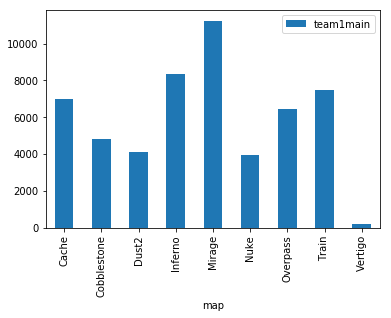

In [44]:
#najczesciej rozgrywane mapy
df_data_model[['team1main','map']].groupby('map').count().plot.bar()
plt.show()

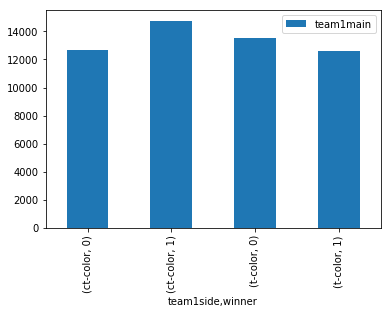

In [45]:
#rozpoczecie po ktorej stronie oraz czy wygrana czy nie
df_data_model[['team1main','team1side','winner']].groupby(['team1side','winner']).count().plot.bar()
plt.show()

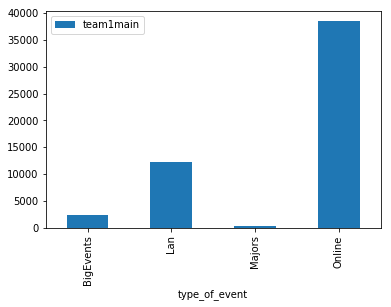

In [47]:
df_data_model[['team1main','type_of_event']].groupby('type_of_event').count().plot.bar()
plt.show()

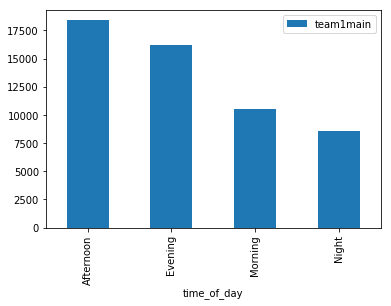

In [50]:
df_data_model[['team1main','time_of_day']].groupby('time_of_day').count().plot.bar()
plt.show()

In [51]:
# co najwazniejsze z tego ktortkiego przegladu to to 
#ze grupy zwiazane z rozpoczeciem po ktorej stronie oraz czy wygrna czy nie sa na podobnym poziomi

##### 6 przetworzenie danych pod pierwszy model 
Jako ze dane w wierszu dla danych numerycznych nie sa znane przed ropoczeciem spoktania, nie mozemy ich wykorzystac do modelowania. Dlatego przeliczmy dla zmiennych numerycznych srednia z poprzednich 10 spotkan dla danej druzyny z pominieciem wynikow dla konkretnego meczu. Wykorzystamy do tego 2 funkcje po pierwsze group - zgrupujemy dane dla danego zespolu (sort = False uchroni nas przed zmiana kolejnosci - kolejne spotkania po sobie) + funkcje shift - przesuniemy dane o 1 - bez danego spoktania

In [52]:
df_data_model_shifted = df_data_model.groupby('team1main', sort=False)[columns_numerical].apply(lambda x : x.rolling(10).mean().shift(1))

In [53]:
# dodajemy zmienna y z danych poprzednich

In [54]:
temp_y = df_data_model['winner']

In [55]:
df_1 = df_data_model_shifted.join(temp_y, how='left')

In [56]:
# jako ze dla niektorych zespolów nie udało się przeliczyc dla 10 oraz to ze funkcja rolling przelicza(z tymi parametrami) 
# gdy sa dostepne dane z 10 spotkan - odpadaja spotkania wczesniejsze
# usuwamy NaN

In [57]:
df1 = df_1.dropna()

In [58]:
# sprawdzamy czy dane sa zbalansowane
df1['winner'].sum()/df1['winner'].count()

0.5376256313453395

##### 7. tworzymy funkcje dla budowy modeli
Tworzymy funkcje ktora bedzie mogla wykorzystujac gridsearch oszacowac nasze modele, i wybrać najlepszy.
Wykorzystamy modele:
- Naiwy Bayes
- Drzewo decyzyjne
- Regresja logistyczna
- SVM
- Las losowy random
- Las losowy bagging
- XGBoost

Do oceny modeli wykorzytamy  accuracy score

In [59]:
#importy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [60]:
def train_models(X_train, X_test, y_train, y_test, model_run=[True, True, True, True, True, True, True]):
    names = np.array(["Naiwny Bayes", "Drzewo decyzyjne", "Regresja logistyczna", "SVM",'Las losowy random', 'Las losowy bagging', 'XGBoost'])
    models = [[("model", MultinomialNB())],
             [("model", DecisionTreeClassifier())],
             [("scaler", MaxAbsScaler()), ("model", LogisticRegression())],
             [("scaler", MaxAbsScaler()),("model", SVC())],
             [("model", RandomForestClassifier())],
             [("model", BaggingClassifier())],
             [("model", XGBClassifier())]]

    param_grids = [{"model__alpha": [0.1, 1, 10], "model__fit_prior": [False, True]},
                   {"model__criterion": ["gini", "entropy"], "model__min_samples_split": [2, 10, 100], "model__max_depth": [None, 2, 10, 100]}, 
                   {"model__penalty": ["l1", "l2"], "model__C": [0.1, 1, 10]},
                  [{"model__kernel": ["linear"]},
                  {"model__kernel": ["rbf"]},
                  {"model__kernel": ["poly"], "model__degree": [2, 3]}],
                   {"model__n_estimators" : [100,50,20], "model__max_features" : [0.5]},
                   {"model__max_samples" : [0.5], "model__bootstrap" : [True, False]},
                   {"model__max_depth":[5,10,20]}
                  ]


    if len(names) != len(models) or len(models) != len(param_grids):
        raise ValueError("Listy nie mają tej samej długości!")

    best_models = []

    for use, name, pipe, params in zip(model_run, names, models, param_grids):
        print(f"Training model: {name}")
        if use==False:
            print("skip")
        else:
            pipeline = Pipeline(pipe)
            gs = GridSearchCV(estimator=pipeline, param_grid=params)
            gs.fit(X_train, y_train)
            for mean, std, param, fit_time, score_time in zip(gs.cv_results_["mean_test_score"],
                                        gs.cv_results_["std_test_score"],
                                        gs.cv_results_["params"],
                                        gs.cv_results_["mean_fit_time"],
                                        gs.cv_results_["mean_score_time"]):
                print(f"parameters: {param}:\n mean score: {mean}, std: {std},\n fitting time: {fit_time}, score time: {score_time}\n")
            best_models.append(gs.best_estimator_)



    scores=[]
    print("\n\nTesting:")
    print("\nAccuracy scores:")
    for name, best_model in zip(names[model_run], best_models):
        score = round(accuracy_score(best_model.predict(X_test), y_test)*100,2)
        print(f"{name}: {score}%")
        scores.append((name, score))
    return(scores, best_models)



##### 8. trenujemy modele na pierwszych danych
wykorzystujemy dane utworzone wczesniej df1 - dane numeryczne dla sredniej kroczacej

In [61]:
#dzielimy dane na train i test w podziale ok 2/3 do 1/3

In [62]:
len_df1 = len(df1.index)

In [63]:
y = df1.winner
X = df1.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [65]:
scores_df1, _ = train_models(X_train, X_test, y_train, y_test)

Training model: Naiwny Bayes


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__alpha': 0.1, 'model__fit_prior': False}:
 mean score: 0.5185988958690272, std: 0.0027409881208040904,
 fitting time: 0.014999071756998697, score time: 0.0030017693837483725

parameters: {'model__alpha': 0.1, 'model__fit_prior': True}:
 mean score: 0.5336759946697125, std: 0.00752812490374375,
 fitting time: 0.014669020970662435, score time: 0.003001054128011068

parameters: {'model__alpha': 1, 'model__fit_prior': False}:
 mean score: 0.5185988958690272, std: 0.0027409881208040904,
 fitting time: 0.014000733693440756, score time: 0.002667109171549479

parameters: {'model__alpha': 1, 'model__fit_prior': True}:
 mean score: 0.5337521416333524, std: 0.007495200202587435,
 fitting time: 0.014000336329142252, score time: 0.003001689910888672

parameters: {'model__alpha': 10, 'model__fit_prior': False}:
 mean score: 0.5185988958690272, std: 0.0027820613242410153,
 fitting time: 0.014000574747721354, score time: 0.0030022462209065757

parameters: {'model__alpha': 10, 'mode

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5133447553778793, std: 0.005472281191216464,
 fitting time: 1.3950013319651287, score time: 0.005667368570963542

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5157433847325338, std: 0.008966807294925582,
 fitting time: 1.374001105626424, score time: 0.00499876340230306

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5153626499143347, std: 0.003006567910437187,
 fitting time: 1.1069984436035156, score time: 0.005003213882446289

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.5471159337521416, std: 0.00225239120542436,
 fitting time: 0.1403327782948812, score time: 0.003999869028727214

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split':

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5553017323434228, std: 0.003201989866754958,
 fitting time: 0.28266628583272296, score time: 0.008333921432495117

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5538549400342662, std: 0.002420970122670824,
 fitting time: 0.38099996248881024, score time: 0.005335330963134766

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5530934703978679, std: 0.0036393775754555635,
 fitting time: 9.051000833511353, score time: 0.0069993336995442705

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.551304016752332, std: 0.003717694910294525,
 fitting time: 0.5743328730265299, score time: 0.006667375564575195

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.550009518370455, std: 0.0038497439346308216,
 fitting time: 38.67145792643229, score time: 0.0073366959889729815

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.55042832667047

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'a

parameters: {'model__kernel': 'linear'}:
 mean score: 0.5394250904245194, std: 0.003163219973790692,
 fitting time: 33.23232873280843, score time: 7.956543763478597

parameters: {'model__kernel': 'rbf'}:
 mean score: 0.5358461831334476, std: 2.7129002500435837e-05,
 fitting time: 38.13439106941223, score time: 9.671441634496054

parameters: {'model__degree': 2, 'model__kernel': 'poly'}:
 mean score: 0.5358461831334476, std: 2.7129002500435837e-05,
 fitting time: 34.431920289993286, score time: 8.162902673085531

parameters: {'model__degree': 3, 'model__kernel': 'poly'}:
 mean score: 0.5358461831334476, std: 2.7129002500435837e-05,
 fitting time: 35.09227935473124, score time: 8.250364859898886

Training model: Las losowy random


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_features': 0.5, 'model__n_estimators': 100}:
 mean score: 0.5337140681515324, std: 0.0009398048851959698,
 fitting time: 44.10389439264933, score time: 0.1730039914449056

parameters: {'model__max_features': 0.5, 'model__n_estimators': 50}:
 mean score: 0.5269369883875881, std: 0.0017619635606886095,
 fitting time: 22.150404294331867, score time: 0.08733344078063965

parameters: {'model__max_features': 0.5, 'model__n_estimators': 20}:
 mean score: 0.5193603655054255, std: 0.0027481396073149784,
 fitting time: 9.092368602752686, score time: 0.038670857747395836

Training model: Las losowy bagging


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__bootstrap': True, 'model__max_samples': 0.5}:
 mean score: 0.5137254901960784, std: 0.003946209858515809,
 fitting time: 5.0746681690216064, score time: 0.0599984327952067

parameters: {'model__bootstrap': False, 'model__max_samples': 0.5}:
 mean score: 0.509994288977727, std: 0.0056930835012334756,
 fitting time: 6.528667449951172, score time: 0.059665520985921226

Training model: XGBoost


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.5353512278697887, std: 0.000777718451349727,
 fitting time: 6.935812950134277, score time: 0.0566710631052653

parameters: {'model__max_depth': 10}:
 mean score: 0.5289168094422235, std: 0.0025086833463814234,
 fitting time: 14.740672588348389, score time: 0.09133013089497884

parameters: {'model__max_depth': 20}:
 mean score: 0.5236245954692557, std: 0.0012793191958962206,
 fitting time: 33.22852921485901, score time: 0.1913318634033203



Testing:

Accuracy scores:
Naiwny Bayes: 54.24%
Drzewo decyzyjne: 54.73%
Regresja logistyczna: 55.56%
SVM: 54.12%
Las losowy random: 54.01%
Las losowy bagging: 51.87%
XGBoost: 54.36%


In [66]:
#wyniki dla danych numerycznych w kolejnych krokaach postaramy się je poprawić
#by ograniczyc przeliczenia w kolejnych krokach wykorzystamy tylko kilka modeli -> 
#Drzewo decyzyjne, regresje logistyczna oraz XGBoost
#po utworzeniu wszystkich dodatkowych zmiennych wykonamy trenowanie na wszystkich modelach

##### 9. dodajemy dane kategoryczne


In [67]:
df2 = df1.join(df_categorical, how='left')

In [68]:
len_df2 = len(df2.index)

In [69]:
#trenujemy model

In [70]:
y = df2.winner
X = df2.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [71]:
scores_df2, __ = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5118218161050828, std: 0.00504916350563051,
 fitting time: 1.4516652425130208, score time: 0.008666276931762695

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.509994288977727, std: 0.0023673795846338884,
 fitting time: 1.4819968541463215, score time: 0.009003400802612305

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5189415572054065, std: 0.00327941576658402,
 fitting time: 1.139665683110555, score time: 0.008335113525390625

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.5478774033885399, std: 0.002392921268590625,
 fitting time: 0.15466745694478354, score time: 0.0069997310638427734

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5559489815343613, std: 0.0020445091821623884,
 fitting time: 0.32933322588602704, score time: 0.011667490005493164

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5546544831524843, std: 0.0009310240848045279,
 fitting time: 0.6569976806640625, score time: 0.012003580729166666

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5550352179706834, std: 0.0025720338534280726,
 fitting time: 8.397660811742147, score time: 0.01100317637125651

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5541214544070056, std: 0.0012124409863834157,
 fitting time: 1.1502575079600017, score time: 0.010333935419718424

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5536264991433466, std: 0.0020364389761569385,
 fitting time: 42.528280893961586, score time: 0.012000401814778646

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.552484294688

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.5453645535884256, std: 0.0020923791241760667,
 fitting time: 8.370341698328653, score time: 0.06666048367818196

parameters: {'model__max_depth': 10}:
 mean score: 0.5393489434608795, std: 0.0009195397486369421,
 fitting time: 18.497852722803753, score time: 0.10999894142150879

parameters: {'model__max_depth': 20}:
 mean score: 0.5398058252427185, std: 0.0025788691294689743,
 fitting time: 41.42820652325948, score time: 0.1979981263478597



Testing:

Accuracy scores:
Drzewo decyzyjne: 54.93%
Regresja logistyczna: 56.12%
XGBoost: 54.65%


In [72]:
#dodanie danych kategorycznych niewiele poprawilo model (praktycznie brak zmian)

##### 10. Tworzymy kolejne kolumny na podstawie biezacych danych by poprawić model. Dodajemy kolumne z informacja jaki byl wynik poprzedniego spotkania dla danej druzyny.

In [73]:
df_temp = df_data_model.groupby('team1main', sort=False)['winner'].shift(1)
df3 = df2.join(df_temp,rsuffix='last_game')

In [74]:
len_df3 = len(df3.index)
print(len_df3)

39202


In [75]:
y = df3.winner
X = df3.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [76]:
scores_df3, __ = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5244622120692938, std: 0.0020815402531653942,
 fitting time: 1.3537321885426838, score time: 0.008999983469645182

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5223681705691986, std: 0.0034024135697770363,
 fitting time: 1.3101287682851155, score time: 0.012675841649373373

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5330668189605939, std: 0.0010704208620336835,
 fitting time: 1.0220006306966145, score time: 0.008667786916097006

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.5533219112887874, std: 0.0032731090704960692,
 fitting time: 0.15566706657409668, score time: 0.00800013542175293

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5573196268798781, std: 0.0023156642541106052,
 fitting time: 0.3579997221628825, score time: 0.01033314069112142

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5578907291071769, std: 0.0016642221586111213,
 fitting time: 0.6186654567718506, score time: 0.011668999989827475

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5583095374071959, std: 0.0014137823749506074,
 fitting time: 8.131661891937256, score time: 0.01333777109781901

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5569008185798592, std: 0.0030410996295167844,
 fitting time: 1.141002098719279, score time: 0.011331399281819662

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5563297163525605, std: 0.0021890283801436114,
 fitting time: 41.34966365496317, score time: 0.012002150217692057

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.5561774224252808

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.560441652389111, std: 0.0037409427481567446,
 fitting time: 8.62219762802124, score time: 0.07433390617370605

parameters: {'model__max_depth': 10}:
 mean score: 0.549133828288597, std: 0.004981455432086078,
 fitting time: 18.972485303878784, score time: 0.1226654052734375

parameters: {'model__max_depth': 20}:
 mean score: 0.5521797068341899, std: 0.003252624797695028,
 fitting time: 41.07214983304342, score time: 0.20067032178243002



Testing:

Accuracy scores:
Drzewo decyzyjne: 55.09%
Regresja logistyczna: 54.83%
XGBoost: 56.03%


In [77]:
#dodanie nowej kolumny poprawilo wynik dla xgboosta (pogorszylo dla pozostałych) ale dalej sa to nieznaczne zmiany.

##### 11. Dodajemy kolumne z informacja jaki byl wynik poprzedniego spotkania dla danej druzyny na konkretnej mapie.

In [78]:
df_temp = df_data_model.groupby(('team1main','map'), sort=False)['winner'].shift(1)
df4 = df3.join(df_temp,rsuffix='last_game_on_map')

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [79]:
df4=df4.dropna()

In [80]:
len_df4 = len(df4.index)
print(len_df4)

37902


In [81]:
y = df4.winner
X = df4.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [82]:
scores_df4, __ = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.519177758525636, std: 0.005670436409829307,
 fitting time: 1.3496657212575276, score time: 0.009002765019734701

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5207529337638812, std: 0.0013548815938191619,
 fitting time: 1.2716677983601887, score time: 0.009002129236857096

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5271323934787745, std: 0.002211615199306961,
 fitting time: 1.0350011984507244, score time: 0.008333603541056315

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.5550129951957156, std: 0.004666278026535166,
 fitting time: 0.16766675313313803, score time: 0.00899958610534668

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_spli

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5556824446719698, std: 0.00103659497129393,
 fitting time: 0.3670012950897217, score time: 0.011332114537556967

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5567850673387414, std: 0.001328703511673586,
 fitting time: 0.6496689319610596, score time: 0.013665437698364258

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.555446168386233, std: 0.001333244853776314,
 fitting time: 7.727996428807576, score time: 0.012333075205485025

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5560762384815311, std: 0.002151667524273581,
 fitting time: 1.238663673400879, score time: 0.01233832041422526

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5555249271481453, std: 0.002473833840769381,
 fitting time: 45.49100931485494, score time: 0.015668074289957683

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.5546979601480665, std:

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.5627313538631172, std: 0.001099854772572107,
 fitting time: 8.416007280349731, score time: 0.0676579475402832

parameters: {'model__max_depth': 10}:
 mean score: 0.5535559581003386, std: 0.002896278238849942,
 fitting time: 18.149001121520996, score time: 0.10733071962992351

parameters: {'model__max_depth': 20}:
 mean score: 0.554264786957549, std: 0.0064192096274963,
 fitting time: 39.9390017191569, score time: 0.19333879152933756



Testing:

Accuracy scores:
Drzewo decyzyjne: 54.54%
Regresja logistyczna: 55.56%
XGBoost: 56.45%


In [83]:
#notujemy kolejna niewielka poprawe wyniku, sprobujemy dodac jeszce kilka zmiennych by poprawic wyniki modelu

##### 12. Dodajemy kolumne z informacja jaki byl wynik miedzy druzynami

In [84]:
df_temp = df_data_model.groupby(('team1main','team2main'), sort=False)['winner'].shift(1)
df5 = df4.join(df_temp,rsuffix='last_game_between_teams')

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [85]:
df5=df5.dropna()

In [86]:
len_df5 = len(df5.index)
print(len_df5)

23746


In [87]:
y = df5.winner
X = df5.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [88]:
scores_df5, __ = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5548431705324031, std: 0.0004032759025771889,
 fitting time: 0.6863316694895426, score time: 0.005333264668782552

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5537117354956314, std: 0.005397701862480097,
 fitting time: 0.6736752192179362, score time: 0.005324761072794597

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.578351876296436, std: 0.0008994417950540965,
 fitting time: 0.5303372542063395, score time: 0.005328973134358724

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.6265007228612735, std: 0.005924922300634631,
 fitting time: 0.1019906997680664, score time: 0.005000750223795573

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_spl

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5781004462882645, std: 0.0025079158566993632,
 fitting time: 0.1900029977162679, score time: 0.007663647333780925

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5750204286881639, std: 0.0033266537569436546,
 fitting time: 0.37533124287923175, score time: 0.007335186004638672

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5732604186309636, std: 0.004647634659573109,
 fitting time: 4.093334436416626, score time: 0.0073320865631103516

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5724432711044063, std: 0.003941351184626378,
 fitting time: 0.7106663386027018, score time: 0.007004578908284505

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.570180401030863, std: 0.0024814523642480322,
 fitting time: 45.050338427225746, score time: 0.008332649866739908

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.5699918285247

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.6141177949588283, std: 0.003572812729244105,
 fitting time: 5.539002339045207, score time: 0.040998617808024086

parameters: {'model__max_depth': 10}:
 mean score: 0.6000377145012257, std: 0.0025109292050945428,
 fitting time: 12.269675572713217, score time: 0.06465903917948405

parameters: {'model__max_depth': 20}:
 mean score: 0.6058834621912125, std: 0.0009188229771180584,
 fitting time: 23.985766649246216, score time: 0.10400136311848958



Testing:

Accuracy scores:
Drzewo decyzyjne: 62.23%
Regresja logistyczna: 56.54%
XGBoost: 60.89%


In [ ]:
#dodanie kolejnej zmienne mocno poprawia wyniki , wynik miedzy druzynami na duzy wplyw

##### 13. Zamianiamy nazwy zespolow , na wartosci numeryczne, wykorzystujemy do tego factorize

In [89]:
categories, mapping_index = pd.factorize(df_data_model['team1main'])

In [90]:
def teams_categories_map(row, column):
    try:
        index = mapping_index.get_loc(row[column])
    except:
        index = np.nan
    return index

df_data_model['team1index'] = df_data_model.apply(lambda x: teams_categories_map(x, 'team1main'), axis=1)
df_data_model['team2index'] = df_data_model.apply(lambda x: teams_categories_map(x, 'team2main'), axis=1)

In [91]:
df_temp = df_data_model[['team1index','team2index']]

In [92]:
df6 = df5.join(df_temp,rsuffix='_indexes')

In [93]:
df6=df6.dropna()

In [94]:
len_df6 = len(df6.index)
print(len_df6)

23654


In [95]:
y = df6.winner
X = df6.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [96]:
scores_df6, __ = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5454946996466431, std: 0.004280499554779476,
 fitting time: 0.7339905897776285, score time: 0.006009976069132487

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5449899040888441, std: 0.008505246166945457,
 fitting time: 0.7053306897481283, score time: 0.006002505620320638

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5664437152953054, std: 0.0034418795120763988,
 fitting time: 0.5693448384602865, score time: 0.004986365636189778

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.6203306410903584, std: 0.008193614785452476,
 fitting time: 0.10099935531616211, score time: 0.005001544952392578

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_sp

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5707344775365977, std: 0.006888908460625845,
 fitting time: 0.19499905904134116, score time: 0.007666428883870442

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5689676930843008, std: 0.004688808957728035,
 fitting time: 0.3786708513895671, score time: 0.008664925893147787

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5679581019687027, std: 0.00346020565006396,
 fitting time: 6.683665196100871, score time: 0.007999579111735025

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5682104997476022, std: 0.00414977387693118,
 fitting time: 0.734334389368693, score time: 0.0076669057210286455

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5683366986370519, std: 0.003031834846643158,
 fitting time: 39.6593345006307, score time: 0.008332173029581705

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.5678319030792529, st

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.6079631499242807, std: 0.005263634368891824,
 fitting time: 5.596333583196004, score time: 0.04566518465677897

parameters: {'model__max_depth': 10}:
 mean score: 0.5942074709742554, std: 0.00460680084696165,
 fitting time: 12.602007468541464, score time: 0.06532502174377441

parameters: {'model__max_depth': 20}:
 mean score: 0.598876829883897, std: 0.009753413087962992,
 fitting time: 24.447998603185017, score time: 0.10066707928975423



Testing:

Accuracy scores:
Drzewo decyzyjne: 63.13%
Regresja logistyczna: 57.24%
XGBoost: 61.89%


In [97]:
#dodanie kategorii oslabia wyniki, sprobujemy dodac kolejne zmienne poprawiajace wynik

##### 14. Wynik dla pary zespolow oraz dla danej mapy

In [98]:
df_temp = df_data_model.groupby(('team1main','team2main','map'), sort=False)['winner'].shift(1)
df7 = df6.join(df_temp,rsuffix='last_game_between_teams_on_map')

C:\Users\Marcin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


In [99]:
df7=df7.dropna()

In [100]:
len_df7 = len(df7.index)
print(len_df7)

9520


In [101]:
y = df7.winner
X = df7.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [102]:
scores_df7, __ = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne
parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5291627469426152, std: 0.009693058335574621,
 fitting time: 0.24433279037475586, score time: 0.002668301264444987

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5283788021323299, std: 0.004247794664203204,
 fitting time: 0.23466690381368002, score time: 0.002999544143676758

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5536218250235183, std: 0.021372814329688888,
 fitting time: 0.165667454401652, score time: 0.002665917078653971

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.5820006271558482, std: 0.00913959964991512,
 fitting time: 0.04200085004170736, score time: 0.002666314442952474

parameters: {'model_

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5711821887739104, std: 0.008641902652568602,
 fitting time: 0.05566596984863281, score time: 0.00333404541015625

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5666353088742553, std: 0.007310469254860293,
 fitting time: 0.08466577529907227, score time: 0.0033348401387532554

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5617748510504861, std: 0.005879063424036576,
 fitting time: 1.6633343696594238, score time: 0.004334449768066406

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5581687049231734, std: 0.006743748249484663,
 fitting time: 0.1766651471455892, score time: 0.004333337148030599

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5544057698338037, std: 0.002697499299793871,
 fitting time: 21.78666591644287, score time: 0.004668235778808594

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.554562558795860

In [103]:
#wyniki się pogarszają - duzy spadek liczby danych spowodowal pogorszenie sie wynikow

##### 15. Weryfikujemy ostatnia dana - liczba kolejnych zwyciestw - dla tych danych wykorzystamy data frame z -2 kroku

In [104]:
def winning_streak(df, column_of_team_name = 'team1main'):
    df_return=pd.DataFrame()
    list_of_teams = df[column_of_team_name].unique()
    number_of_teams = len(list_of_teams)
    for idx, team in enumerate(list_of_teams):
        df_temp = df[df[column_of_team_name]==team][['winner','date']]
        list_winning = df_temp['winner'].values.tolist()
        list_winning_streak = []
        streak = 0
        for i in list_winning:
            list_winning_streak.append(streak)
            if i==1:
                streak = streak +1
            else:
                streak = 0
        df_temp['winining_streak'] = list_winning_streak
        df_return = pd.concat([df_return,df_temp])
        print(f'{idx} / {number_of_teams}')
        clear_output(wait=True)
    return df_return

In [105]:
df_temp = winning_streak(df_data_no_nan)

3092 / 3093


In [106]:
df8 = df6.join(df_temp,rsuffix='winning_streak')
df8 = df8.drop(columns=['winnerwinning_streak','date'])

In [107]:
len_df8 = len(df8.index)
print(len_df8)

23654


In [108]:
y = df8.winner
X = df8.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [109]:
scores_df8, __ = train_models(X_train, X_test, y_train, y_test, [False, True, True, False, False,False, True])

Training model: Naiwny Bayes
skip
Training model: Drzewo decyzyjne


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5561585058051489, std: 0.0017493231268909792,
 fitting time: 0.7552991708119711, score time: 0.006334384282430013

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.552183240787481, std: 0.004154792757192426,
 fitting time: 0.7226648330688477, score time: 0.006000836690266927

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5836698637051994, std: 0.005649458717409087,
 fitting time: 0.5716742674509684, score time: 0.005333662033081055

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.6263250883392226, std: 0.005466593564354984,
 fitting time: 0.10366384188334148, score time: 0.005327304204305013

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_spl

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5723119636547198, std: 0.0063560114974512,
 fitting time: 0.20599722862243652, score time: 0.007666746775309245

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5691569914184755, std: 0.010988956577326502,
 fitting time: 0.38933459917704266, score time: 0.007337093353271484

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5701665825340737, std: 0.00748857574678869,
 fitting time: 4.647666613260905, score time: 0.006999810536702474

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5704820797576982, std: 0.009748860533852106,
 fitting time: 0.7543315092722574, score time: 0.008004029591878256

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5683366986370519, std: 0.009247492860921904,
 fitting time: 38.49033808708191, score time: 0.008001883824666342

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.5678319030792529, s

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.6208354366481575, std: 0.0032251493830907363,
 fitting time: 5.6493345101674395, score time: 0.04233384132385254

parameters: {'model__max_depth': 10}:
 mean score: 0.6077107521453812, std: 0.003539761780044368,
 fitting time: 12.682664553324381, score time: 0.06600109736124675

parameters: {'model__max_depth': 20}:
 mean score: 0.6116229177183241, std: 0.0021184111021353112,
 fitting time: 24.112667560577393, score time: 0.10033305486043294



Testing:

Accuracy scores:
Drzewo decyzyjne: 61.91%
Regresja logistyczna: 57.46%
XGBoost: 61.58%


##### 16. liczba krotek po przetworzeniu
Przez dodawnaie kolejnych zmiennych czesc z informacji nie mozemy utworzyć np. w sytuacji w której 2 kolejne zespoły nie grały nigdy ze soba

In [110]:
len_of_data = [len_df1, len_df2, len_df3, len_df4, len_df5, len_df6, len_df7, len_df8]

In [111]:
len_of_data

[39202, 39202, 39202, 37902, 23746, 23654, 9520, 23654]

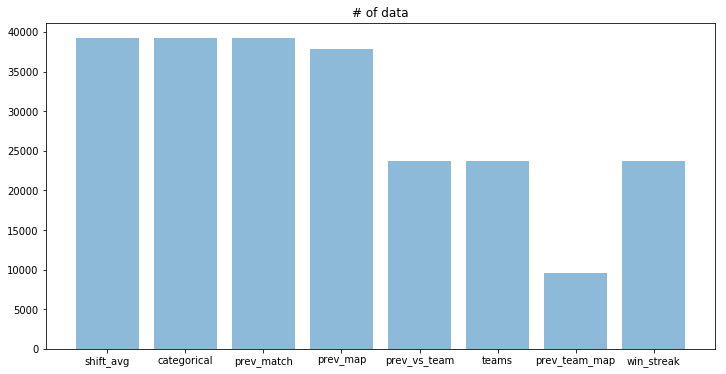

In [112]:
y_pos = np.arange(len(len_of_data))

variables = ['shift_avg', 'categorical', 'prev_match','prev_map', 'prev_vs_team', 'teams' , 'prev_team_map', 'win_streak']


fig, ax = plt.subplots(figsize=(12,6))

plt.bar(y_pos, len_of_data, align='center', alpha=0.5)
plt.xticks(y_pos, variables)
plt.title('# of data')
plt.show()

In [113]:
# widzimy najwieksze spadki po dodaniu zmiennej - mecz przeciwko druzynie (nie zawsze te same druzyny sie spotkykaja), 
# oraz jeszcze wiekszy po meczu przeciwko druzynie na danej mapie 

##### 17. wyniki vs kolejne zmienne
do porownania wybierzemy wyniki dla kolejnych modeli xg boost

In [114]:
scores_list = [scores_df1,scores_df2, scores_df3, scores_df4,scores_df5, scores_df6, scores_df7,scores_df8]

In [115]:
score_xgboost = [x[-1][1] for x in scores_list]

In [116]:
score_xgboost

[54.36, 54.65, 56.03, 56.45, 60.89, 61.89, 57.16, 61.58]

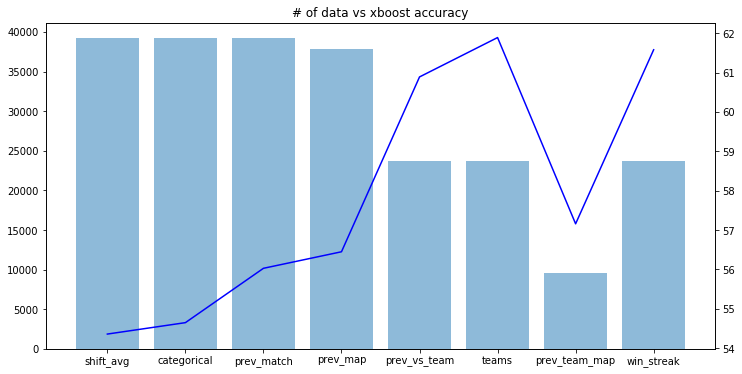

In [117]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 =  ax1.twinx()

ax1.bar(y_pos, len_of_data , align='center', alpha=0.5)
ax2.plot(y_pos, score_xgboost, 'b-')

plt.xticks(y_pos, variables)
plt.title('# of data vs xboost accuracy')
plt.show()


##### 18. finalny model
Do trenowania finalnego modelu uzyjemy df8 zawierajacego dane bez zmiennej - poprzedni wynik miedzy dryznami na danej mapie. Ostateczny zestaw danych nie zawiera wszystkich kombinacji, ale w przypadku prognozowania wynikow spotkan nie musimy planowac wszystkich meczów. Zawsze mozemy sprawdzić wczesniej czy dana zmienna dla danej pary przeciwnikow bedzie miala jakas wartość.
Do ostatecznego modelu sprobujemy wytrenowac model dla wszystkich zaprogramowanych w funkcji opcji.


In [118]:
y = df8.winner
X = df8.drop(columns=['winner'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [119]:
scores_df8, best_models = train_models(X_train, X_test, y_train, y_test)

Training model: Naiwny Bayes


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__alpha': 0.1, 'model__fit_prior': False}:
 mean score: 0.5128722867238769, std: 0.015917810214652807,
 fitting time: 0.01566775639851888, score time: 0.00466609001159668

parameters: {'model__alpha': 0.1, 'model__fit_prior': True}:
 mean score: 0.5126829883897022, std: 0.01581355546177306,
 fitting time: 0.016001224517822266, score time: 0.004333893458048503

parameters: {'model__alpha': 1, 'model__fit_prior': False}:
 mean score: 0.5128722867238769, std: 0.015917810214652807,
 fitting time: 0.016333659489949543, score time: 0.00500027338663737

parameters: {'model__alpha': 1, 'model__fit_prior': True}:
 mean score: 0.5126829883897022, std: 0.01581355546177306,
 fitting time: 0.01599884033203125, score time: 0.004001220067342122

parameters: {'model__alpha': 10, 'model__fit_prior': False}:
 mean score: 0.5127460878344271, std: 0.015747578261690445,
 fitting time: 0.017667373021443684, score time: 0.005001465479532878

parameters: {'model__alpha': 10, 'model__fit_pri

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 2}:
 mean score: 0.5557799091367996, std: 0.0048103448635559145,
 fitting time: 0.696733315785726, score time: 0.006002108256022136

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 10}:
 mean score: 0.5509843513377082, std: 0.0064389278215984435,
 fitting time: 0.684334913889567, score time: 0.006335337956746419

parameters: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_split': 100}:
 mean score: 0.5771075214538112, std: 0.010595318644752784,
 fitting time: 0.5326673984527588, score time: 0.006334225336710612

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}:
 mean score: 0.6215926299848561, std: 0.001448564911616005,
 fitting time: 0.10233648618062337, score time: 0.004997094472249349

parameters: {'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_spl

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be chang

parameters: {'model__C': 0.1, 'model__penalty': 'l1'}:
 mean score: 0.5692831903079253, std: 0.004016264830549886,
 fitting time: 0.20533283551534018, score time: 0.007671753565470378

parameters: {'model__C': 0.1, 'model__penalty': 'l2'}:
 mean score: 0.5669485108531045, std: 0.003189082508232736,
 fitting time: 0.41399558385213214, score time: 0.0076677799224853516

parameters: {'model__C': 1, 'model__penalty': 'l1'}:
 mean score: 0.5647400302877335, std: 0.0034869355453230476,
 fitting time: 8.179665168126425, score time: 0.007668018341064453

parameters: {'model__C': 1, 'model__penalty': 'l2'}:
 mean score: 0.5629732458354366, std: 0.002795386065677495,
 fitting time: 0.854671319325765, score time: 0.008328994115193685

parameters: {'model__C': 10, 'model__penalty': 'l1'}:
 mean score: 0.5617743563856638, std: 0.0030213204775617498,
 fitting time: 50.08787941932678, score time: 0.008664846420288086

parameters: {'model__C': 10, 'model__penalty': 'l2'}:
 mean score: 0.56196365471983

C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'a

parameters: {'model__kernel': 'linear'}:
 mean score: 0.5651186269560828, std: 0.004451075637789286,
 fitting time: 16.93032995859782, score time: 4.150001207987468

parameters: {'model__kernel': 'rbf'}:
 mean score: 0.5651817264008077, std: 0.004458613851638547,
 fitting time: 16.260998884836834, score time: 4.6160032749176025

parameters: {'model__degree': 2, 'model__kernel': 'poly'}:
 mean score: 0.5651817264008077, std: 0.004458613851638547,
 fitting time: 15.031714916229248, score time: 4.200339237848918

parameters: {'model__degree': 3, 'model__kernel': 'poly'}:
 mean score: 0.5651817264008077, std: 0.004458613851638547,
 fitting time: 15.076998074849447, score time: 4.545003493626912

Training model: Las losowy random


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_features': 0.5, 'model__n_estimators': 100}:
 mean score: 0.6118122160524987, std: 0.0014986039237369405,
 fitting time: 22.940545002619427, score time: 0.10733222961425781

parameters: {'model__max_features': 0.5, 'model__n_estimators': 50}:
 mean score: 0.6050605754669359, std: 0.0012971643613481907,
 fitting time: 11.022687276204428, score time: 0.050336360931396484

parameters: {'model__max_features': 0.5, 'model__n_estimators': 20}:
 mean score: 0.5909262998485614, std: 0.0008219738359849873,
 fitting time: 4.5666821002960205, score time: 0.03100426991780599

Training model: Las losowy bagging


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__bootstrap': True, 'model__max_samples': 0.5}:
 mean score: 0.5819661786976275, std: 0.006227848664341962,
 fitting time: 2.6003352801005044, score time: 0.05466564496358236

parameters: {'model__bootstrap': False, 'model__max_samples': 0.5}:
 mean score: 0.5891595153962645, std: 0.001402205135804051,
 fitting time: 3.2809985478719077, score time: 0.04933269818623861

Training model: XGBoost


C:\Users\Marcin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


parameters: {'model__max_depth': 5}:
 mean score: 0.6118753154972236, std: 0.003627453465636576,
 fitting time: 5.98867146174113, score time: 0.04232970873514811

parameters: {'model__max_depth': 10}:
 mean score: 0.5986244321049975, std: 0.0036910178142770065,
 fitting time: 12.91332999865214, score time: 0.06633559862772624

parameters: {'model__max_depth': 20}:
 mean score: 0.6000757193336699, std: 0.000801910622491409,
 fitting time: 25.726565837860107, score time: 0.10433793067932129



Testing:

Accuracy scores:
Naiwny Bayes: 50.99%
Drzewo decyzyjne: 62.87%
Regresja logistyczna: 58.2%
SVM: 58.05%
Las losowy random: 61.34%
Las losowy bagging: 58.66%
XGBoost: 62.02%


In [125]:
scores = [x[1] for x in scores_df8]
names = [x[0] for x in scores_df8]

In [133]:
pd.DataFrame(scores_df8)

,0,1
0,Naiwny Bayes,50.99
1,Drzewo decyzyjne,62.87
2,Regresja logistyczna,58.20
3,SVM,58.05
4,Las losowy random,61.34
5,Las losowy bagging,58.66
6,XGBoost,62.02


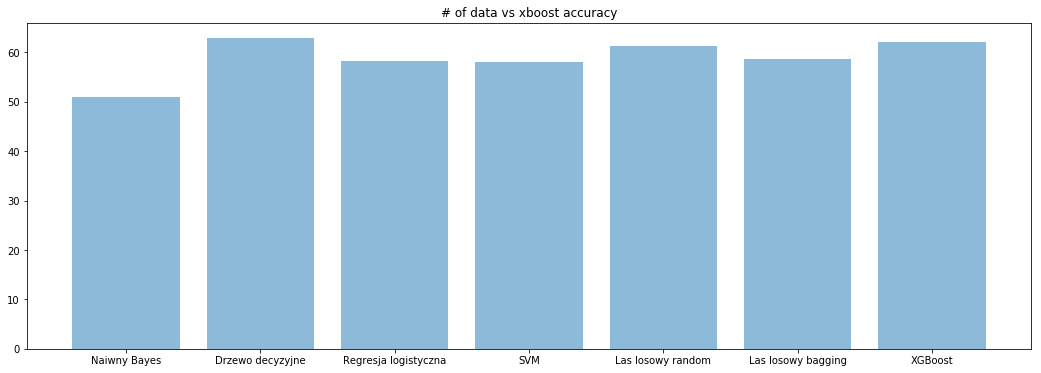

In [129]:
y_pos = np.arange(len(scores))

fig, ax1 = plt.subplots(figsize=(18,6))
ax1.bar(y_pos, scores , align='center', alpha=0.5)

plt.xticks(y_pos, names)
plt.title('# of data vs xboost accuracy')
plt.show()

In [132]:
#Najlepszy wynik osiagnieto dla Drzewa decyzyjnego z parametrami, podobne wyniki dał XGboost oraz las losowy.
best_models[1]

Pipeline(memory=None,
         steps=[('model',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=2, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

In [134]:
#Modelowanie pokazalo ze dzieki przeksztalceniom tych samych danych mozemy poprawić wyraznie wyniki modelu. 
#Oczywiście nadal jest mozliwe przygotowanie wiekszej liczby zmiennyc, lub dodatkowe przeksztalcanie juz obecnych np. przez 
#zmiane dlugosci sredniej kroczacej